# An empirical introduction to statistical copulae

inspired by: https://github.com/tinoproductions/DirtyQuant/blob/master/Introduction%20to%20Copulas.ipynb

A copula describes the structure of the correlation between two (or more) variables.

We start by generating a data set with two variables $X$ and $Y$, both following a normal distribution, and with a positive correlation, meaning that points with a high $X$ value are likely to have a high $Y$ value:

Text(0, 0.5, 'Y')

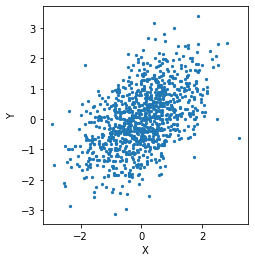

In [2]:
import numpy as np

mean = [0,0]
rho = 0.5
cov = [[1,rho],[rho,1]]

# Generate data points with the desired correlation:
X,Y = np.random.multivariate_normal(mean,cov,1000).T

import matplotlib.pyplot as plt
plt.subplot(aspect=1.)
plt.scatter( X,Y , s=5)
plt.xlabel('X'); plt.ylabel('Y')

## Cumulative distribution function

We noew compute the cumulative distribution function (CDF), which is a function telling us, for any possible value of $X$ (and $Y$), which fraction of the data points are lower than this value.

Text(0, 0.5, 'fraction of points under this value')

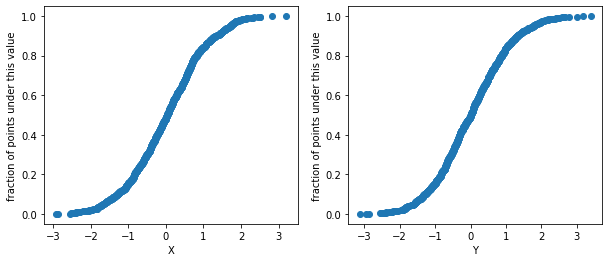

In [3]:
def empirical_cdf(xxx):
    """
    Input:
        xxx : an array of values
        
    Output:
        ppp : an array of the same length, with a value in [0,1] for each element of xxx
    """
    N = len(xxx)
    ppp = [len(xxx[xxx<value])/N for value in xxx]
    return np.array(ppp)

cdf_X = empirical_cdf(X)
cdf_Y = empirical_cdf(Y)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter( X , cdf_X )
plt.xlabel('X')
plt.ylabel('fraction of points under this value')

plt.subplot(122)
plt.scatter( Y , cdf_Y )
plt.xlabel('Y')
plt.ylabel('fraction of points under this value')

In this precise case, we know that the distribution of $X$ and $Y$ is taken from a normal distribution (a multivariate Gaussian), so we could also use the theoretical value of the CDF, for instance from `scipy`. The results would be very similar:

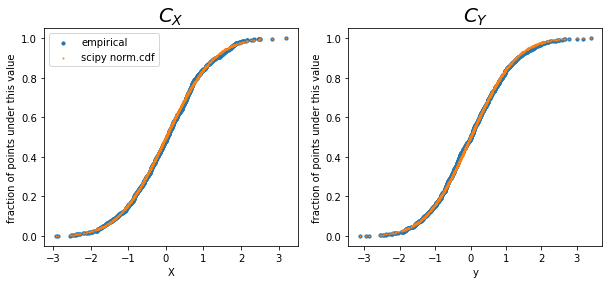

In [4]:
from scipy.stats import norm

scipy_cdf_X = norm.cdf(X)
scipy_cdf_Y = norm.cdf(Y)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter( X , cdf_X , s=10 , label='empirical')
plt.scatter( X , scipy_cdf_X , s=1 , label='scipy norm.cdf')
plt.xlabel('X')
plt.ylabel('fraction of points under this value')
plt.title('$C_X$',fontsize=20)
plt.legend()

plt.subplot(122)
plt.scatter( Y , cdf_Y , s=10 )
plt.scatter( Y , scipy_cdf_Y , s=1 )
plt.xlabel('y')
plt.ylabel('fraction of points under this value')
plt.title('$C_Y$',fontsize=20);

Every point ($X_i$,$Y_i$) gets a ($C_X$,$C_Y$) value. 

If we show the same set of points in this new space, we get the following:

Text(0, 0.5, '$C_Y$')

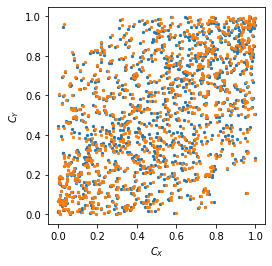

In [5]:
plt.subplot(aspect=1)
plt.scatter( cdf_X , cdf_Y , s=5 )
plt.scatter( scipy_cdf_X , scipy_cdf_Y , s=5 )
plt.xlabel('$C_X$')
plt.ylabel('$C_Y$')

This joint density of multivariate CDFs is the **copula** of our ($X$,$Y$) distribution. 

We see two clear aggregates of points, in the bottom left and top right corners. Qualitatively, this means that: points that are in the bottom 20% of $X$ values ($C_X$<0.2) are almost always in the bottom 20% of $Y$ values too.

Looking at data in this transformed space can be useful, because it turns out (by construction!) that $C_X$ and $C_Y$ are both uniformly distributed (if you look at them individually) but when taken jointly, they exhibit correlations (their joint 2D distribution is not uniform).

We can verify that if we construct the $(C_X,C_Y)$ distribution of a set of ($X_i$,$Y_i$) points with zero correlations, the copula ends up being flat:

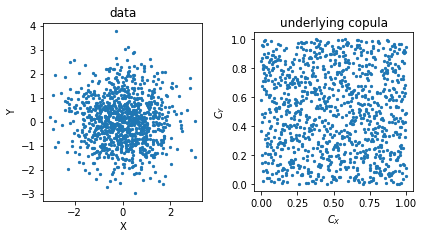

In [6]:
X_nocorr,Y_nocorr = np.random.multivariate_normal(mean,[[1,0],[0,1]],1000).T

plt.subplot(121,aspect=1.)
plt.scatter( X_nocorr,Y_nocorr ,s=5 )
plt.xlabel('X'); plt.ylabel('Y')
plt.title('data')

cdf_X_nocorr = empirical_cdf(X_nocorr)
cdf_Y_nocorr = empirical_cdf(Y_nocorr)
plt.subplot(122,aspect=1)
plt.scatter( cdf_X_nocorr , cdf_Y_nocorr , s=5 )
plt.xlabel('$C_X$')
plt.ylabel('$C_Y$')
plt.title('underlying copula')

plt.tight_layout()

## Copula for Student t-distribution

We use scipy to sample a bivariate t distribution. Taken separately, $X$ and $Y$ both come from a Student-t distribution. 

Text(0.5, 1.0, 'underlying copula')

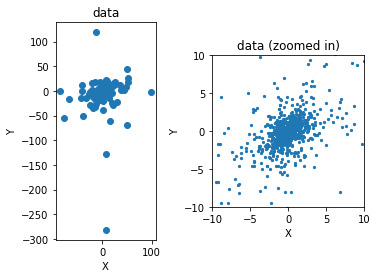

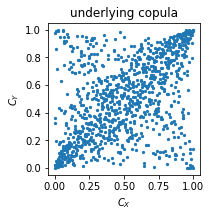

In [7]:
from scipy.stats import multivariate_t

X_t,Y_t = multivariate_t.rvs(mean,cov,size=1000).T


plt.figure()
#
plt.subplot(121,aspect=1)
plt.scatter( X_t , Y_t )
plt.title('data')
plt.xlabel('X'); plt.ylabel('Y')
#
plt.subplot(122,aspect=1)
plt.scatter( X_t , Y_t , s=5 )
plt.xlim(-10,10); plt.ylim(-10,10)
plt.title('data (zoomed in)')
plt.xlabel('X'); plt.ylabel('Y')

cdf_X_t = empirical_cdf(X_t)
cdf_Y_t = empirical_cdf(Y_t)

plt.figure()
plt.subplot(122,aspect=1)
plt.scatter( cdf_X_t , cdf_Y_t , s=5 )
plt.xlabel('$C_X$')
plt.ylabel('$C_Y$')
plt.title('underlying copula')

Here the structure of the copula is different from the bivariate normal case, despite the correlation $\rho$ being the same. 

## Exact computation

So far we have generated samples and transformed the data space to copula space in order to visualise the new density distribution. In many cases, statisticians have worked out the exact expression of the copula corresponding to bivariate (or multivariate) distributions:

https://en.wikipedia.org/wiki/Copula_(probability_theory)#Mathematical_derivation_of_copula_density_function

For instance, in the bivariate Gaussian case:

\begin{align}
F(u,v) = {} & \frac{1}{\sqrt{1-\rho^2}} \exp\left (-\frac{(a^2+b^2)\rho^2-2 ab\rho}{ 2(1-\rho^2) } \right ) \\
& \text{where } \rho\in (-1,1)\\
& \text{where } a=\sqrt{2} \operatorname{erf}^{-1}(2u-1) \\
& \text{where } b =\sqrt{2}\operatorname{erf}^{-1}(2v-1) \\
& \text{where } \operatorname{erf}(z) = \frac{2}{\sqrt\pi} \int\limits_0^z \exp (-t^2) \, dt
\end{align}

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


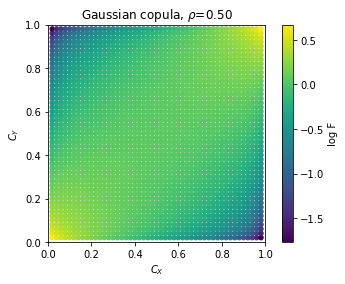

In [50]:
rho = 0.5

from scipy.special import erfinv
u = np.arange(0.02,1.02,0.02)
v = np.arange(0.02,1.02,0.02)
ugrid,vgrid = np.meshgrid(u,v)

a = np.sqrt(2) * erfinv(2*ugrid-1)
b = np.sqrt(2) * erfinv(2*vgrid-1)

F = (1./np.sqrt(1-rho**2)) * np.exp( -1*(  (a**2+b**2)*rho**2 - 2*a*b*rho )    / (2*(1-rho**2)))

plt.subplot(111,aspect=1.)
plt.scatter( ugrid , vgrid , c=np.log10(F) , s=20 )
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('$C_X$')
plt.ylabel('$C_Y$')
plt.colorbar(label='log F')
plt.title('Gaussian copula, $\\rho$=%.2f' % (rho));

# APOGEE data

Let's construct the empirical copula of elemental abundances of APOGEE stars.

https://ui.adsabs.harvard.edu/abs/2023MNRAS.526.1997P/abstract

https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=III/286/catalog

In [185]:
from astroquery.vizier import Vizier
vizierApogeeDR17 = Vizier(catalog='III/286/catalog',
                         columns=['[M/H]','[Mg/Fe]', '_RAJ2000', '_DEJ2000','Hmag'])
vizierApogeeDR17.ROW_LIMIT = 10000

In [202]:
%%time
apogeeData = vizierApogeeDR17.query_constraints(EFlag='0',__M_H_='-1..1',logg='0..2.5')[0]

CPU times: user 210 ms, sys: 11.5 ms, total: 222 ms
Wall time: 661 ms


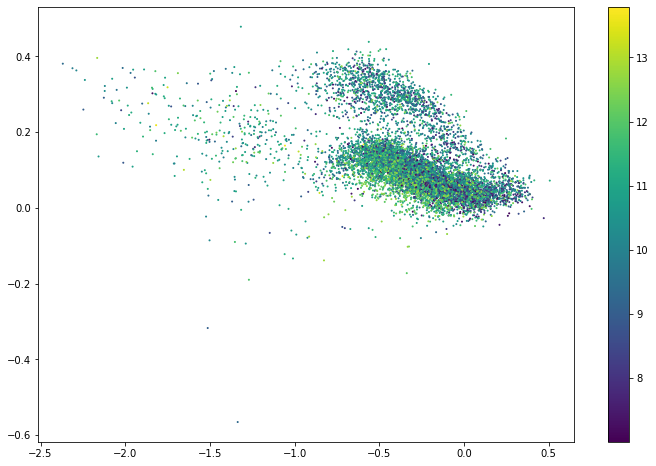

In [203]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter( apogeeData['__M_H_'] , apogeeData['__Mg_Fe_'] , s=1 , c=apogeeData['Hmag'], alpha=1)
plt.colorbar()

Text(0.5, 1.0, 'underlying copula')

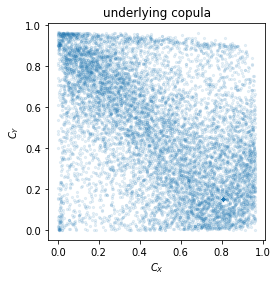

In [204]:
plt.subplot(111,aspect=1)
plt.scatter( cdf_X_a , cdf_Y_a , s=5 , alpha=0.1 )
plt.xlabel('$C_X$')
plt.ylabel('$C_Y$')
plt.title('underlying copula')